In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/mobile-uncleaned-data-set-scrapped-real-website'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-uncleaned-data-set-scrapped-real-website/mobile.csv


## Data Cleaning

In [2]:
df = pd.read_csv('/kaggle/input/mobile-uncleaned-data-set-scrapped-real-website/mobile.csv')

In [3]:
df.head()

Name  Spec Score  rating  price  \
0  OPPO Reno 14 Pro 5G          89    4.65  41990   
1      OPPO Reno 14 5G          87    4.75  32990   
2           Poco F7 5G          83    4.75  31999   
3         Vivo X200 FE          89    4.65  49990   
4         OPPO K13x 5G          73    4.20  11999   

                                                 img       tag  \
0  https://cdn1.smartprix.com/rx-is822PXo3-w280-h...  UPCOMING   
1  https://cdn1.smartprix.com/rx-iRGgfcGDH-w280-h...  UPCOMING   
2  https://cdn1.smartprix.com/rx-icmgBU9Q2-w280-h...  LAUNCHED   
3  https://cdn1.smartprix.com/rx-iHI7IaQgQ-w280-h...  UPCOMING   
4  https://cdn1.smartprix.com/rx-iXUulomIY-w280-h...  LAUNCHED   

                                                 sim  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
1  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
2  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
3  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
4                 Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   

                                           processor  \
0      Dimensity 8450, Octa Core, 3.25 GHz Processor   
1      Dimensity 8350, Octa Core, 3.35 GHz Processor   
2   Snapdragon 8s Gen4, Octa Core, 3.2 GHz Processor   
3  Dimensity 9300 Plus, Octa Core, 3.25 GHz Proce...   
4       Dimensity 6300, Octa Core, 2.4 GHz Processor   

                     storage                                  battery  \
0  12 GB RAM, 256 GB inbuilt  6200 mAh Battery with 80W Fast Charging   
1   8 GB RAM, 256 GB inbuilt  6000 mAh Battery with 80W Fast Charging   
2  12 GB RAM, 256 GB inbuilt  7550 mAh Battery with 90W Fast Charging   
3  12 GB RAM, 256 GB inbuilt  6500 mAh Battery with 90W Fast Charging   
4   4 GB RAM, 128 GB inbuilt  6000 mAh Battery with 45W Fast Charging   

                                             display  \
0  6.83 inches, 1272 x 2800 px, 120 Hz Display wi...   
1  6.59 inches, 1256 x 2760 px, 120 Hz Display wi...   
2  6.83 inches, 1280 x 2772 px, 120 Hz Display wi...   
3  6.31 inches, 1216 x 2640 px, 120 Hz Display wi...   
4  6.67 inches, 720 x 1604 px, 120 Hz Display wit...   

                                              camera  \
0  50 MP + 50 MP + 50 MP Triple Rear & 50 MP Fron...   
1  50 MP + 50 MP + 8 MP Triple Rear & 50 MP Front...   
2        50 MP + 8 MP Dual Rear & 20 MP Front Camera   
3  50 MP + 50 MP + 8 MP Triple Rear & 50 MP Front...   
4         50 MP + 2 MP Dual Rear & 8 MP Front Camera   

                     memoryExternal      version           fm  
0                               NaN  Android v15  No FM Radio  
1                               NaN  Android v15  No FM Radio  
2         Memory Card Not Supported  Android v15          NaN  
3         Memory Card Not Supported  Android v15          NaN  
4  Memory Card Supported, upto 2 TB  Android v15          NaN

In [4]:
df.isnull().sum()

Name                0
Spec Score          0
rating              0
price               0
img                 0
tag                 0
sim                 0
processor          26
storage            20
battery             6
display             1
camera             11
memoryExternal    351
version            48
fm                725
dtype: int64

In [5]:
df.describe()

Spec Score       rating          price
count  1019.000000  1019.000000    1019.000000
mean     78.513248     4.377380   35006.714426
std      12.754081     0.234293   40671.714570
min       7.000000     3.450000      99.000000
25%      75.000000     4.150000   13999.000000
50%      81.000000     4.400000   23498.000000
75%      85.000000     4.600000   39990.000000
max      96.000000     4.750000  489990.000000

In [6]:
q1 = np.percentile(df['Spec Score'], 25)
q3 = np.percentile(df['Spec Score'], 75)
iqr = q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_list = [x for x in df['Spec Score'] if x < lower_bound or x > upper_bound]
print(f"\nOutliers (IQR method - List):\n{outliers_list}")


Outliers (IQR method - List):
[36, 29, 23, 58, 7, 9, 24, 55, 20, 32, 14, 59, 22, 56, 11, 57, 33, 16, 15, 21, 22, 20, 51, 48, 52, 16, 17, 13, 34, 55, 17, 30, 14, 13, 10, 16, 56, 47, 18, 12, 17, 15]


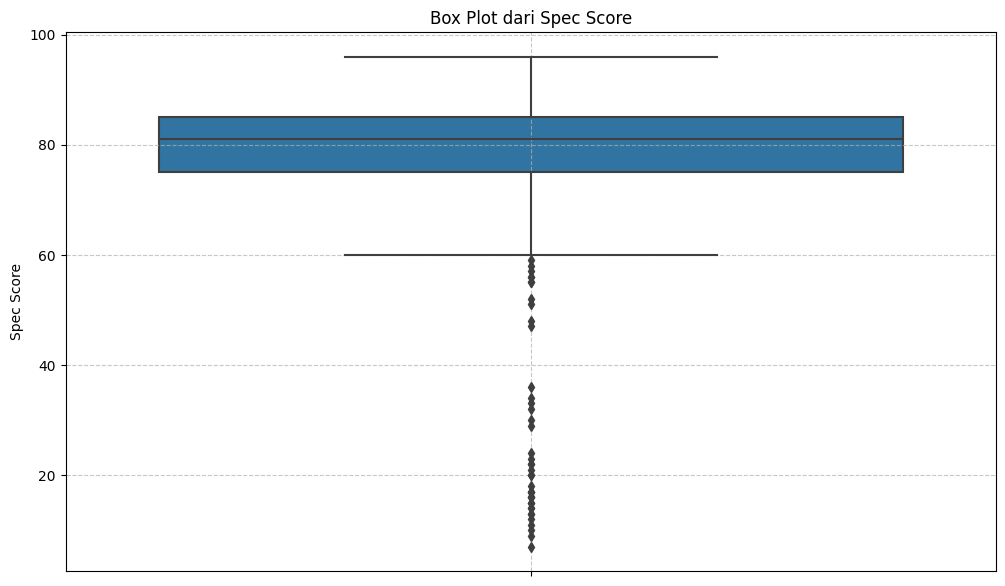

In [7]:
plt.figure(figsize=(12, 7)) 
sns.boxplot(y=df['Spec Score'])
plt.title('Box Plot dari Spec Score')
plt.ylabel('Spec Score') 
plt.grid(True, linestyle='--', alpha=0.7)
plt.show() 